In [1]:
import pandas as pd
import numpy as np

df_20k = pd.read_csv("ABC_Feature_Matrix_Random.csv")

print("="*50)
print("DATASET INFORMATION")
print("="*50)
print(f"20k shape: {df_20k.shape}")
print(f"20k unique planets: {df_20k['planet_ID'].nunique()}")
print(f"20k duplicates: {df_20k['planet_ID'].duplicated().sum()}")
print(f"20k missing values: {df_20k.isna().sum().sum()}")


target_cols = df_20k.columns[-6:]
print(f"\nTarget columns: {list(target_cols)}")

# Check target distributions
print("\nTarget statistics:")
print(df_20k[target_cols].describe())

DATASET INFORMATION
20k shape: (20000, 59)
20k unique planets: 20000
20k duplicates: 0
20k missing values: 0

Target columns: ['planet_temp', 'log_H2O', 'log_CO2', 'log_CH4', 'log_CO', 'log_NH3']

Target statistics:
        planet_temp       log_H2O       log_CO2       log_CH4        log_CO  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean    1196.069380     -6.019339     -6.506969     -5.993546     -4.501452   
std      673.558459      1.736783      1.450776      1.740826      0.865326   
min      114.221259     -8.999792     -8.999929     -8.999470     -5.999986   
25%      709.126023     -7.519693     -7.761165     -7.508222     -5.245848   
50%     1062.756365     -6.048258     -6.526567     -5.981283     -4.503294   
75%     1517.000937     -4.509282     -5.251085     -4.474035     -3.744975   
max     5476.018309     -3.000064     -4.000088     -3.000384     -3.000002   

            log_NH3  
count  20000.000000  
mean      -6.488710  
std   

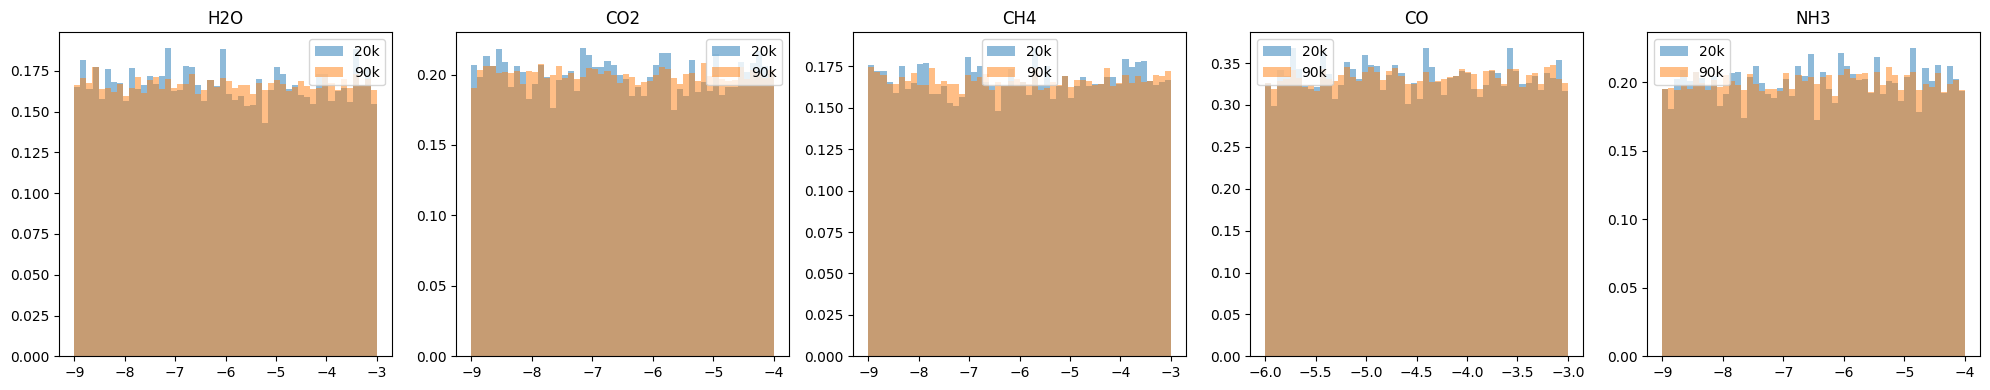

In [2]:
import matplotlib.pyplot as plt

df_20k = pd.read_csv("ABC_Feature_Matrix_Random.csv")
df_90k = pd.read_csv("complete_dataset.csv")

# Compare target distributions
molecules = ['H2O', 'CO2', 'CH4', 'CO', 'NH3']
target_cols = ['log_H2O', 'log_CO2', 'log_CH4', 'log_CO', 'log_NH3']

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, (mol, col) in enumerate(zip(molecules, target_cols)):
    axes[i].hist(df_20k[col], alpha=0.5, label='20k', bins=50, density=True)
    axes[i].hist(df_90k[col], alpha=0.5, label='90k', bins=50, density=True)
    axes[i].set_title(mol)
    axes[i].legend()
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
import numpy as np

df_20k = pd.read_csv("ABC_Feature_Matrix_Random.csv")
df_90k = pd.read_csv("complete_dataset.csv")

# Check if 20k is a subset of 90k
planet_ids_20k = set(df_20k['planet_ID'])
planet_ids_90k = set(df_90k['planet_ID'])

overlap = len(planet_ids_20k & planet_ids_90k)
print(f"Overlapping planets: {overlap} / {len(planet_ids_20k)}")

if overlap == len(planet_ids_20k):
    print("20k is a SUBSET of 90k")
else:
    print("20k and 90k are DIFFERENT random samples")

Overlapping planets: 20000 / 20000
20k is a SUBSET of 90k


In [4]:
import pandas as pd
import numpy as np
from scipy import stats


df_20k = pd.read_csv("ABC_Feature_Matrix_Random.csv")
df_90k = pd.read_csv("complete_dataset.csv")

molecules = ['log_H2O', 'log_CO2', 'log_CH4', 'log_CO', 'log_NH3']

print("="*80)
print("STATISTICAL COMPARISON: 20k vs 90k Datasets")
print("="*80)

# 1. Kolmogorov-Smirnov Test (tests if distributions are different)
print("\n1. KOLMOGOROV-SMIRNOV TEST (Distribution Similarity)")
print("-"*80)
print(f"{'Molecule':<10} {'KS Statistic':<15} {'p-value':<15} {'Significant?':<15}")
print("-"*80)

ks_results = {}
for mol in molecules:
    ks_stat, p_value = stats.ks_2samp(df_20k[mol], df_90k[mol])
    ks_results[mol] = {'ks_stat': ks_stat, 'p_value': p_value}
    
    # p < 0.05 means distributions are significantly different
    significant = "YES (Different)" if p_value < 0.05 else "NO (Similar)"
    print(f"{mol:<10} {ks_stat:<15.4f} {p_value:<15.4e} {significant:<15}")

print("-"*80)
print("Note: p-value < 0.05 means distributions are significantly DIFFERENT")

# 2. Mean and Std comparison
print("\n2. MEAN COMPARISON")
print("-"*80)
print(f"{'Molecule':<10} {'20k Mean':<12} {'90k Mean':<12} {'Difference':<12} {'% Change':<12}")
print("-"*80)

for mol in molecules:
    mean_20k = df_20k[mol].mean()
    mean_90k = df_90k[mol].mean()
    diff = mean_90k - mean_20k
    pct_change = (diff / abs(mean_20k)) * 100
    print(f"{mol:<10} {mean_20k:<12.4f} {mean_90k:<12.4f} {diff:<12.4f} {pct_change:<12.2f}%")

print("\n3. STANDARD DEVIATION COMPARISON")
print("-"*80)
print(f"{'Molecule':<10} {'20k Std':<12} {'90k Std':<12} {'Difference':<12} {'% Change':<12}")
print("-"*80)

for mol in molecules:
    std_20k = df_20k[mol].std()
    std_90k = df_90k[mol].std()
    diff = std_90k - std_20k
    pct_change = (diff / std_20k) * 100
    print(f"{mol:<10} {std_20k:<12.4f} {std_90k:<12.4f} {diff:<12.4f} {pct_change:<12.2f}%")

# 3. Range comparison
print("\n4. VALUE RANGE COMPARISON")
print("-"*80)
print(f"{'Molecule':<10} {'20k Range':<25} {'90k Range':<25} {'Range Overlap':<15}")
print("-"*80)

for mol in molecules:
    min_20k, max_20k = df_20k[mol].min(), df_20k[mol].max()
    min_90k, max_90k = df_90k[mol].min(), df_90k[mol].max()
    
    # Check if ranges overlap
    overlap_min = max(min_20k, min_90k)
    overlap_max = min(max_20k, max_90k)
    
    if overlap_min < overlap_max:
        overlap_pct = ((overlap_max - overlap_min) / (max(max_20k, max_90k) - min(min_20k, min_90k))) * 100
        overlap_str = f"{overlap_pct:.1f}%"
    else:
        overlap_str = "NO OVERLAP!"
    
    range_20k = f"[{min_20k:.2f}, {max_20k:.2f}]"
    range_90k = f"[{min_90k:.2f}, {max_90k:.2f}]"
    print(f"{mol:<10} {range_20k:<25} {range_90k:<25} {overlap_str:<15}")

# 4. Outlier comparison (values beyond 3 std)
print("\n5. OUTLIER ANALYSIS (|value - mean| > 3*std)")
print("-"*80)
print(f"{'Molecule':<10} {'20k Outliers':<15} {'90k Outliers':<15} {'90k has more?':<15}")
print("-"*80)

for mol in molecules:
    mean_20k, std_20k = df_20k[mol].mean(), df_20k[mol].std()
    mean_90k, std_90k = df_90k[mol].mean(), df_90k[mol].std()
    
    outliers_20k = ((df_20k[mol] - mean_20k).abs() > 3 * std_20k).sum()
    outliers_90k = ((df_90k[mol] - mean_90k).abs() > 3 * std_90k).sum()
    
    outlier_pct_20k = (outliers_20k / len(df_20k)) * 100
    outlier_pct_90k = (outliers_90k / len(df_90k)) * 100
    
    more = "YES" if outlier_pct_90k > outlier_pct_20k else "NO"
    
    print(f"{mol:<10} {outliers_20k} ({outlier_pct_20k:.2f}%){'':<4} {outliers_90k} ({outlier_pct_90k:.2f}%){'':<4} {more:<15}")

# 5. Earth Mover's Distance (Wasserstein distance)
print("\n6. WASSERSTEIN DISTANCE (Earth Mover's Distance)")
print("-"*80)
print(f"{'Molecule':<10} {'Distance':<15} {'Interpretation':<30}")
print("-"*80)

for mol in molecules:
    # Calculate Wasserstein distance
    distance = stats.wasserstein_distance(df_20k[mol], df_90k[mol])
    
    # Normalize by std to interpret
    combined_std = np.sqrt((df_20k[mol].std()**2 + df_90k[mol].std()**2) / 2)
    normalized_distance = distance / combined_std
    
    if normalized_distance < 0.1:
        interpretation = "Very similar"
    elif normalized_distance < 0.3:
        interpretation = "Moderately similar"
    elif normalized_distance < 0.5:
        interpretation = "Somewhat different"
    else:
        interpretation = "Very different"
    
    print(f"{mol:<10} {distance:<15.4f} {interpretation:<30}")

print("-"*80)
print("Note: Smaller Wasserstein distance = more similar distributions")

# SUMMARY
print("\n" + "="*80)
print("SUMMARY: Are the distributions different?")
print("="*80)

significantly_different = sum(1 for mol in molecules if ks_results[mol]['p_value'] < 0.05)

if significantly_different >= 4:
    print("WARNING: Datasets have SIGNIFICANTLY DIFFERENT distributions!")
    print(f"   {significantly_different}/5 molecules show significant differences (KS test p < 0.05)")
    print("   The model trained on 90k sees a different data distribution than 20k.")
elif significantly_different >= 2:
    print("CAUTION: Some distributions differ between datasets")
    print(f"   {significantly_different}/5 molecules show significant differences")
    print("   This may impact model performance.")
else:
    print("Distributions are SIMILAR between 20k and 90k datasets")

print("="*80)

STATISTICAL COMPARISON: 20k vs 90k Datasets

1. KOLMOGOROV-SMIRNOV TEST (Distribution Similarity)
--------------------------------------------------------------------------------
Molecule   KS Statistic    p-value         Significant?   
--------------------------------------------------------------------------------
log_H2O    0.0094          1.1262e-01      NO (Similar)   
log_CO2    0.0046          8.7353e-01      NO (Similar)   
log_CH4    0.0047          8.6048e-01      NO (Similar)   
log_CO     0.0053          7.3898e-01      NO (Similar)   
log_NH3    0.0043          9.1805e-01      NO (Similar)   
--------------------------------------------------------------------------------
Note: p-value < 0.05 means distributions are significantly DIFFERENT

2. MEAN COMPARISON
--------------------------------------------------------------------------------
Molecule   20k Mean     90k Mean     Difference   % Change    
------------------------------------------------------------------------